# Kvaliteta življenja v Kibergradu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'Kibergrad.csv'
df = pd.read_csv(csv_file_path)

In [2]:
df = df.rename(columns={"'TIP'": 'TIP', "'CLANOV'": 'CLANOV', "'OTROK'": 'OTROK', "'DOHODEK'": 'DOHODEK', "'CETRT'": 'CETRT', "'IZOBRAZBA'": 'IZOBRAZBA'})

## Analiza bogatih in revnih

V tabelo bogatih dodamo 1000 najbogatejših družin.

In [3]:
bogati = df[df["DOHODEK"] > df.sort_values("DOHODEK", ascending=False).iloc[1000]["DOHODEK"]]
bogati["DOHODEK"].mean()

156949.927

In [4]:
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


V tabelo revnih dodamo 1000 najrevnejših družin.

In [5]:
revni = df[df["DOHODEK"] < df.sort_values("DOHODEK", ascending=False).iloc[-1000]["DOHODEK"]]
revni["DOHODEK"].mean()

414.26452905811624

In [6]:
import math
stand_odk_bogati = math.sqrt(bogati["DOHODEK"].var())
stand_odk_revni = math.sqrt(revni["DOHODEK"].var())
stand_odk_bogati

38230.70630577349

In [7]:
stand_odk_revni

1638.8649441243067

In [8]:
revni["DOHODEK"].max()

2190

Sedaj primerjajmo bogate in revne družine po ostalih parametrih in na podlagi tega postavimo hipoteze o korelacijskem koeficientu med določenimi količinami.

In [9]:
revni["IZOBRAZBA"].mean()

37.833667334669336

In [10]:
bogati["IZOBRAZBA"].mean()

42.648

In [11]:
revni["IZOBRAZBA"].var()

7.655354842081354

In [12]:
bogati["IZOBRAZBA"].var()

6.410506506506506

In [13]:
df["IZOBRAZBA"].min()

31

In [14]:
bogati["IZOBRAZBA"].min()

31

In [15]:
bogati["IZOBRAZBA"].max()

46

In [16]:
revni["IZOBRAZBA"].min()

31

In [17]:
revni["IZOBRAZBA"].max()

45

Opazimo, da morata biti izobrazba in dohodek pozitivno korelirana. Sumimo, da je korelacija nekje 0,3 do 0,4.

In [18]:
bogati["OTROK"].mean()

0.579

In [19]:
revni["OTROK"].mean()

1.2735470941883769

In [20]:
bogati["OTROK"].max()

6

In [21]:
revni["OTROK"].max()

8

Iz zgornjega se zdi, da morata biti število otrok in dohodek negativno korelirana. Korelacijski koeficient bi lahko bil nekje -0,2.

## Preizkus hipotez

In [22]:
df["DOHODEK"].corr(df["IZOBRAZBA"])

0.4499440967870731

In [23]:
df["DOHODEK"].corr(df["OTROK"])

-0.08045934385825014

In [24]:
df.describe()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
count,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000
mean,1.430935,3.137288,0.947933,41335.507041,2.526090,39.422504
std,0.793332,1.293711,1.157211,32037.619418,1.078228,3.021883
min,1.000000,2.000000,0.000000,-22166.000000,1.000000,31.000000
25%,1.000000,2.000000,0.000000,18300.000000,2.000000,39.000000
50%,1.000000,3.000000,1.000000,34550.000000,3.000000,39.000000
75%,1.000000,4.000000,2.000000,55827.750000,3.000000,41.000000
max,3.000000,25.000000,9.000000,451887.000000,4.000000,46.000000


In [25]:
df[df["CETRT"].isin([1,2])]

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
20534,1,2,0,31216,2,39
20535,1,3,0,65002,2,40
20536,1,5,3,70674,2,43
20537,1,3,0,57623,2,40


In [26]:
bogati.describe()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.067000,3.313000,0.579000,156949.927000,2.394000,42.648000
std,0.332598,1.363411,0.935218,38230.706306,1.192554,2.531898
min,1.000000,2.000000,0.000000,123908.000000,1.000000,31.000000
25%,1.000000,2.000000,0.000000,133199.500000,1.000000,41.000000
50%,1.000000,3.000000,0.000000,144947.500000,2.000000,43.000000
75%,1.000000,4.000000,1.000000,166386.750000,4.000000,44.000000
max,3.000000,11.000000,6.000000,451887.000000,4.000000,46.000000


## Srečnostni indeks

In [27]:
import math
u_doh = int(df["DOHODEK"].mean())
u_izo = float(df["IZOBRAZBA"].mean())
def funkcija(x):
    if x < u_doh:
        return 2**(x /u_doh)
    else:
        return 2 + math.log(1 + (x - u_doh)/u_doh, 2)

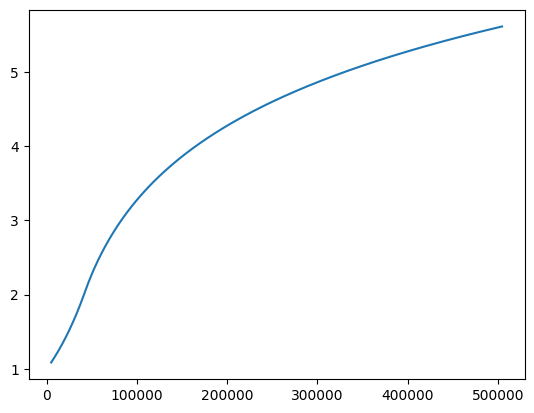

In [28]:
import numpy as np
x_values = []
t = 5000
for i in range(1000):
    x_values.append(t)
    t += 500

y_values = []
for e in x_values:
    y_values.append(funkcija(e))

x_os = np.array(x_values)
y_os = np.array(y_values)

plt.plot(x_os, y_os)
plt.show()

In [29]:
def normalna(x):
    return 1/math.sqrt(2*math.pi*float(df["IZOBRAZBA"].var()))*math.exp(-(x - u_izo)**2/(2*float(df["IZOBRAZBA"].var())))

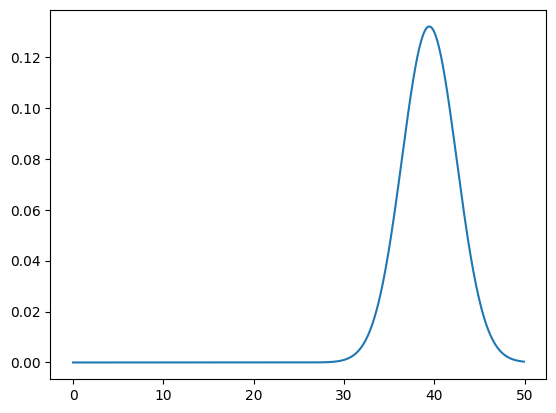

In [30]:
import numpy as np
x_values = []
t = 0
for i in range(500):
    x_values.append(t)
    t += 0.1

y_values = []
for e in x_values:
    y_values.append(normalna(e))

x_os = np.array(x_values)
y_os = np.array(y_values)

plt.plot(x_os, y_os)
plt.show()

In [31]:
df["SRECNOST"] = (df["OTROK"])*(df["DOHODEK"].apply(funkcija))*(df["IZOBRAZBA"].apply(normalna)+20)
df_srecen = df.sort_values("SRECNOST", ascending=False)
df_srecen

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
37379,1,12,9,78555,4,46,527.066465
12810,1,10,8,100500,2,43,526.801403
8946,1,9,7,114535,1,43,487.440731
38998,1,9,6,133090,4,31,442.496026
18596,1,14,9,49880,2,46,409.050107
...,...,...,...,...,...,...,...
25062,1,2,0,13920,3,36,0.000000
8021,1,2,0,70000,1,39,0.000000
25056,3,3,0,23245,3,39,0.000000
25055,3,4,0,29675,3,34,0.000000


<Axes: >

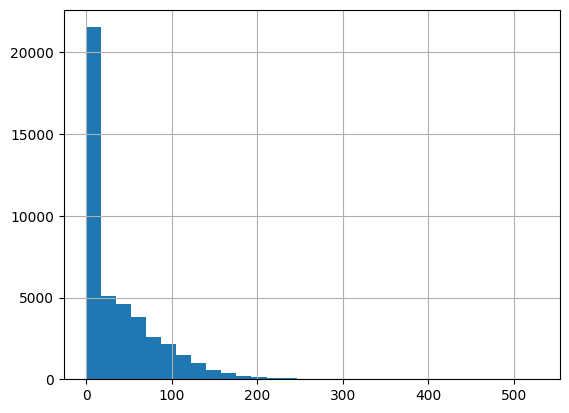

In [32]:
df["SRECNOST"].hist(bins=30)

In [34]:
df_srecen.describe()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
count,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000
mean,1.430935,3.137288,0.947933,41335.507041,2.526090,39.422504,35.928525
std,0.793332,1.293711,1.157211,32037.619418,1.078228,3.021883,47.516614
min,1.000000,2.000000,0.000000,-22166.000000,1.000000,31.000000,0.000000
25%,1.000000,2.000000,0.000000,18300.000000,2.000000,39.000000,0.000000
50%,1.000000,3.000000,1.000000,34550.000000,3.000000,39.000000,20.781397
75%,1.000000,4.000000,2.000000,55827.750000,3.000000,41.000000,60.319915
max,3.000000,25.000000,9.000000,451887.000000,4.000000,46.000000,527.066465


In [39]:
df_srecen[(df_srecen["SRECNOST"] > 60) & (df_srecen["SRECNOST"] < 62)]

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
39981,1,4,2,26000,4,35,61.999937
9159,3,4,3,1566,1,40,61.995721
1049,1,5,1,87970,1,43,61.995351
6178,1,5,1,87700,1,42,61.987359
30953,3,4,3,1656,3,37,61.984820
...,...,...,...,...,...,...,...
11506,3,3,2,23799,2,39,60.008164
1694,1,5,3,0,1,31,60.008145
4698,3,4,3,0,1,31,60.008145
41243,3,4,3,0,4,31,60.008145
